In [1]:
import arrow
import netCDF4 as nc
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:

##load sea and air temperature

tdir = './For_TJ/'

seatemp_RCP45 = nc.Dataset(f'{tdir}NEP36-CanOE_temp_RCP45_2046-2065_monthly_SS.nc')
seatemp_hist = nc.Dataset(f'{tdir}NEP36-CanOE_temp_historical_1986-2005_monthly_SS.nc')

# tas_RCP45 = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_RCP45_2046-2065_107x107_SS.nc')
# tas_hist = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_1986-2005_107x107_SS.nc')


In [4]:
deptht = (seatemp_hist['deptht'][:])

Text(0.5, 0.98, 'all in deg C')

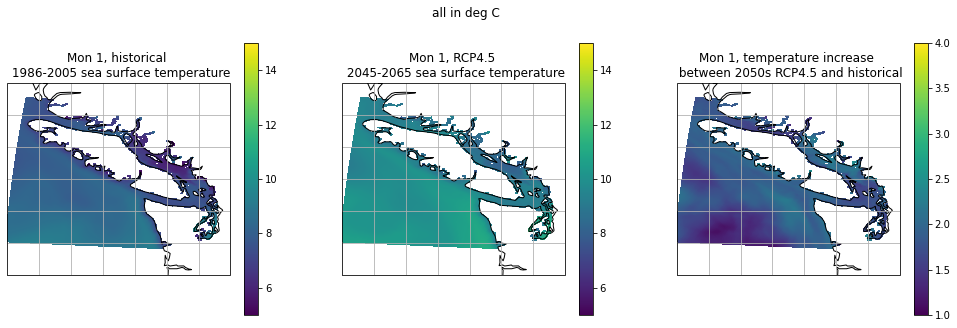

In [5]:
tvmin = 5
tvmax = 15
lat = seatemp_hist['nav_lat'][:]
lon = seatemp_hist['nav_lon'][:]
# lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = seatemp_hist['temp'][0,0,:,:]
data_RCP45 = seatemp_RCP45['temp'][0,0,:,:]

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon, lat, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Mon 1, historical \n 1986-2005 sea surface temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon, lat, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'Mon 1, RCP4.5 \n 2045-2065 sea surface temperature')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon, lat, data_RCP45-data_hist, vmin = 1, vmax = 4, transform=ccrs.PlateCarree())
ax2.set_title(f'Mon 1, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)
plt.suptitle('all in deg C')

Text(0.5, 0.98, 'JUNE all in deg C')

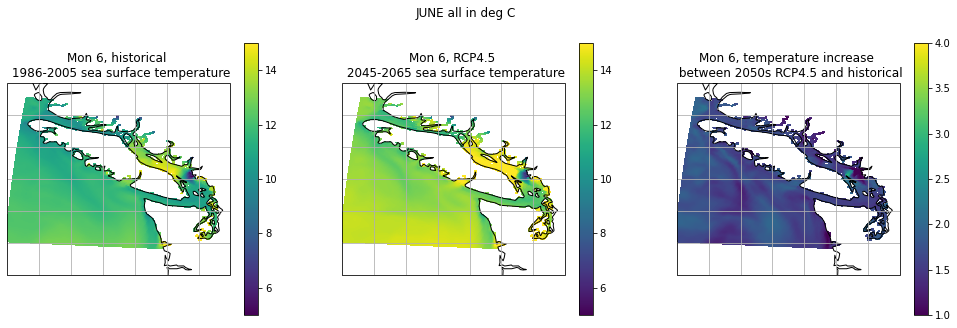

In [6]:
tvmin = 5
tvmax = 15
lat = seatemp_hist['nav_lat'][:]
lon = seatemp_hist['nav_lon'][:]
# lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = seatemp_hist['temp'][5,0,:,:]
data_RCP45 = seatemp_RCP45['temp'][5,0,:,:]

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon, lat, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Mon 6, historical \n 1986-2005 sea surface temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon, lat, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'Mon 6, RCP4.5 \n 2045-2065 sea surface temperature')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon, lat, data_RCP45-data_hist, vmin = 1, vmax = 4, transform=ccrs.PlateCarree())
ax2.set_title(f'Mon 6, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)
plt.suptitle('JUNE all in deg C')

Text(0.5, 1.0, 'Mon 6, historical \n 1986-2005 sea surface temperature')

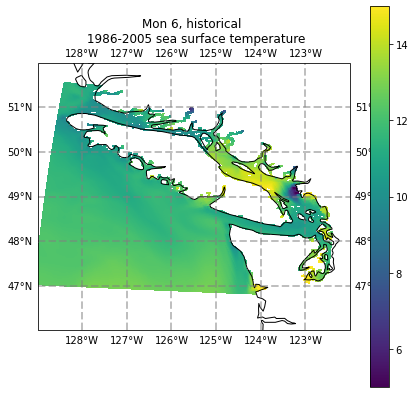

In [7]:
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


plt.figure(figsize=(7, 7))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent(extent)
# ax1.gridlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon, lat, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Mon 6, historical \n 1986-2005 sea surface temperature')


In [8]:
#mean, std, max, min
hist_stats = np.zeros([12,4])
RCP45_stats = np.zeros([12,4])
delta_stats = np.zeros([12,4])
# data_hist = tas_hist['tas'][0,:]-273.15
# data_RCP45 = tas_RCP45['tas'][0,:]-273.15

for i in range(0,12):
    
    data_hist = seatemp_hist['temp'][i,0,:,:]
    data_RCP45 = seatemp_RCP45['temp'][i,0,:,:]
    data_delta = data_RCP45-data_hist
    
    hist_stats[i,0] = np.nanmean(data_hist); hist_stats[i,1] = np.nanstd(data_hist);
    hist_stats[i,2] = np.nanmax(data_hist); hist_stats[i,3] = np.nanmin(data_hist);
    RCP45_stats[i,0] = np.nanmean(data_RCP45); RCP45_stats[i,1] = np.nanstd(data_RCP45);
    RCP45_stats[i,2] = np.nanmax(data_RCP45); RCP45_stats[i,3] = np.nanmin(data_RCP45);
    delta_stats[i,0] = np.nanmean(data_delta); delta_stats[i,1] = np.nanstd(data_delta);
    delta_stats[i,2] = np.nanmax(data_delta); delta_stats[i,3] = np.nanmin(data_delta);

    
    

/home/tjarniko/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Text(0.5, 1.0, 'average monthly sea-surface $\\Delta$T between historical scenario and RCP4.5')

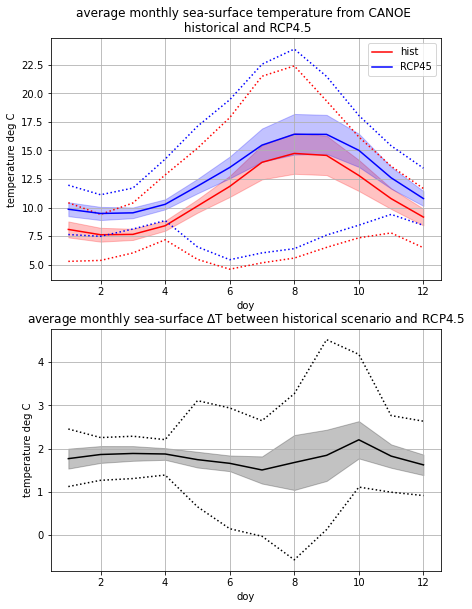

In [9]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(10*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

daze = np.arange(1,13,1)
axs[0].plot(daze,hist_stats[:,0], 'r-', label = 'hist')
axs[0].plot(daze,hist_stats[:,3], 'r:' )
axs[0].plot(daze,hist_stats[:,2], 'r:' )
axs[0].fill_between(daze,hist_stats[:,0]+hist_stats[:,1],\
                    hist_stats[:,0]-hist_stats[:,1], color = 'r', alpha = 0.24 )

axs[0].plot(daze,RCP45_stats[:,0], 'b-', label = 'RCP45')
axs[0].plot(daze,RCP45_stats[:,3], 'b:' )
axs[0].plot(daze,RCP45_stats[:,2], 'b:' )
axs[0].fill_between(daze,RCP45_stats[:,0]+RCP45_stats[:,1],\
                    RCP45_stats[:,0]-RCP45_stats[:,1], color = 'b', alpha = 0.24 )

axs[1].plot(daze,delta_stats[:,0], 'k-', label = 'delta')
axs[1].plot(daze,delta_stats[:,3], 'k:' )
axs[1].plot(daze,delta_stats[:,2], 'k:' )
axs[1].fill_between(daze,delta_stats[:,0]+delta_stats[:,1],\
                    delta_stats[:,0]-delta_stats[:,1], color = 'k', alpha = 0.24 )

for i in range(0,2):
    axs[i].set_xlabel('doy')
    axs[i].set_ylabel('temperature deg C')
    axs[i].grid()
    
axs[0].legend()
axs[0].set_title('average monthly sea-surface temperature from CANOE \n historical and RCP4.5')
axs[1].set_title('average monthly sea-surface $\Delta$T between historical scenario and RCP4.5')

In [10]:
JDF_LAT = 48.474215
JDF_LON = -124.632903

JS_LAT = 50.480559
JS_LON = -126.172599

from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))


np.shape(lon)

distances_JDF = np.zeros_like(lon)
distances_JS = np.zeros_like(lon)
tw = np.shape(lon)
for i in range(0,tw[0]):
    if i%10 == 0:
        print(i)
    for j in range(0,tw[1]):
        distances_JDF[i,j] = distance(JDF_LAT,JDF_LON,lat[i,j],lon[i,j])
        distances_JS[i,j] = distance(JS_LAT,JS_LON,lat[i,j],lon[i,j])
        


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


In [11]:
print(np.min(distances_JDF))

print(np.where(distances_JDF == np.min(distances_JDF)))
print(JDF_LAT)
print(lat[113,157])
print(JDF_LON)
print(lon[113,157])
JDF_ind = [113,157]

print(np.where(distances_JS == np.min(distances_JS)))
print(JS_LAT)
print(lat[253,90])
print(JS_LON)
print(lon[253,90])
JS_ind = [253,90]

data_hist_JDF = seatemp_hist['temp'][:,:,113-5:113+5,157-5:157+5]
data_hist_JS = seatemp_hist['temp'][:,:,253-5:253+5,90-5:90+5]
data_RCP45_JDF = seatemp_RCP45['temp'][:,:,113-5:113+5,157-5:157+5]
data_RCP45_JS = seatemp_RCP45['temp'][:,:,253-5:253+5,90-5:90+5]

delta_JDF = data_RCP45_JDF-data_hist_JDF
delta_JS = data_RCP45_JS-data_hist_JS


0.66437083
(array([113]), array([157]))
48.474215
48.476894
-124.632903
-124.62485
(array([253]), array([90]))
50.480559
50.47676
-126.172599
-126.16349


In [12]:
np.shape(data_hist_JDF)

stats_JDF = np.zeros([12,50,4])
stats_JS = np.zeros([12,50,4])

for i in range(0,12):
    for j in range(0,28):
        
        stats_JDF[i,j,0] = np.nanmean(delta_JDF[i,j,:,:])
        stats_JDF[i,j,1] = np.nanstd(delta_JDF[i,j,:,:])
        stats_JDF[i,j,2] = np.nanmin(delta_JDF[i,j,:,:])
        stats_JDF[i,j,3] = np.nanmax(delta_JDF[i,j,:,:])
        
for i in range(0,12):
    for j in range(0,28):
        
        stats_JS[i,j,0] = np.nanmean(delta_JS[i,j,:,:])
        stats_JS[i,j,1] = np.nanstd(delta_JS[i,j,:,:])
        stats_JS[i,j,2] = np.nanmin(delta_JS[i,j,:,:])
        stats_JS[i,j,3] = np.nanmax(delta_JS[i,j,:,:])
        
stats_JDF[stats_JDF== 0 ]= np.nan
stats_JS[stats_JS== 0 ]= np.nan

/home/tjarniko/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Text(0.5, 1.0, 'JdF $\\Delta$T (degC)')

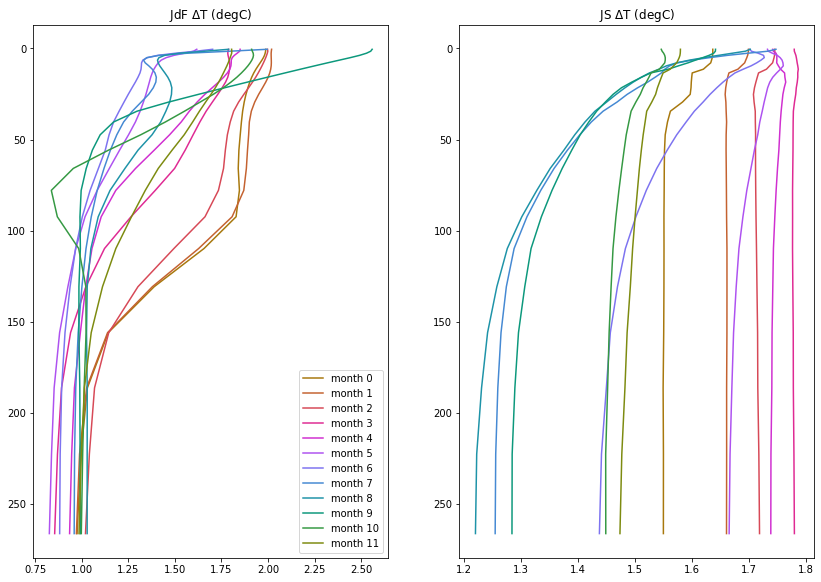

In [13]:
from cmocean import cm
tcm = cm.phase

fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


deptht
for i in range(0,12):
    axs[0].plot(stats_JDF[i,:,0], deptht, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    axs[1].plot(stats_JS[i,:,0], deptht, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    
    
axs[0].legend()
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[1].set_title('JS $\Delta$T (degC)')
axs[0].set_title('JdF $\Delta$T (degC)')

## make files for delta T by month

http://localhost:8803/notebooks/notebooks/RIVER_PAPER/future_pilot/INITIALIZATION/JDF_MAKE_CAR50_SSP245_2017_boundary_conditions.ipynb

### first need to interpolate onto our grid. looks gr8. 

In [14]:
from scipy.interpolate import interp1d
  
X = [1,2,3,4,5] # random x values
Y = [11,2.2,3.5,-88,1] # random y values
  
# test value
interpolate_x = 2.5
  
# Finding the interpolation
y_interp = interp1d(X, Y)
print("Value of Y at x = {} is".format(interpolate_x),
      y_interp(interpolate_x))


xvals = deptht[:]

stats_JDF[i,:,0]



Value of Y at x = 2.5 is 2.85


array([1.80437922, 1.80531859, 1.80469394, 1.80090237, 1.79649413,
       1.79174137, 1.78606892, 1.77905607, 1.7704289 , 1.76053512,
       1.7491585 , 1.73525774, 1.71705043, 1.69350147, 1.6647594 ,
       1.63170409, 1.59536099, 1.54992032, 1.48527348, 1.41073453,
       1.34109259, 1.26688862, 1.18302691, 1.11152279, 1.0509156 ,
       1.01439595, 0.99756545, 0.98543918,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [15]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth_ssc = (w['gdept_1d'][0][:])

## place to store interpolated values
JDF_delta_ssc = np.zeros([12,40])
JS_delta_ssc = np.zeros([12,40])

for m in range(0,12):
    X = deptht[:]
    Y_JDF = stats_JDF[m,:,0]
    Y_JS = stats_JS[m,:,0]
    y_interp_JDF = interp1d(X, Y_JDF)
    y_interp_JS = interp1d(X, Y_JS)
    
    for d in range(0,40):
        JDF_delta_ssc[m,d] = y_interp_JDF(depth_ssc[d])
        JS_delta_ssc[m,d] = y_interp_JS(depth_ssc[d])

Text(0.5, 1.0, 'JdF $\\Delta$T (degC)')

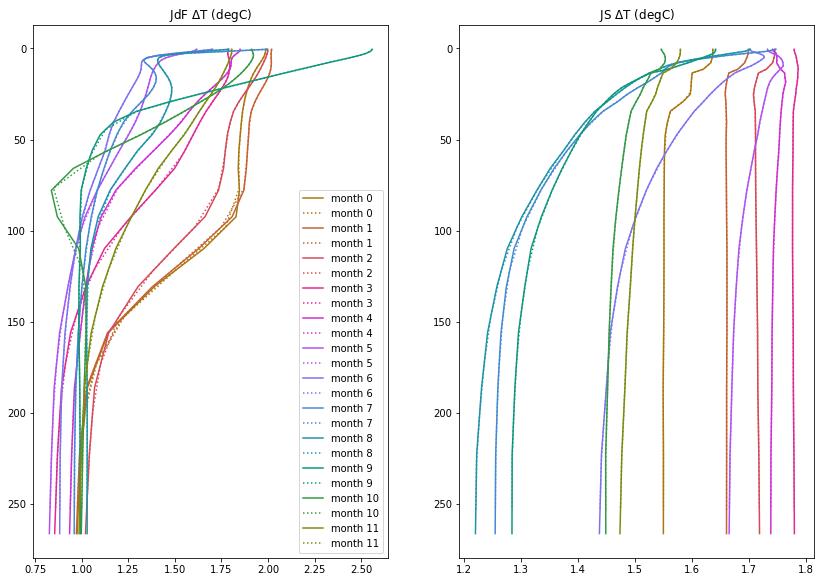

In [16]:
from cmocean import cm
tcm = cm.phase

fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


deptht
for i in range(0,12):
    axs[0].plot(stats_JDF[i,:,0], deptht, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    axs[1].plot(stats_JS[i,:,0], deptht, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    axs[0].plot(JDF_delta_ssc[i,:], depth_ssc, color = tcm((i)/12),linestyle = ':', label = f'month {i}')
    axs[1].plot(JS_delta_ssc[i,:], depth_ssc, color = tcm((i)/12),linestyle = ':', label = f'month {i}')

    
axs[0].legend()
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[1].set_title('JS $\Delta$T (degC)')
axs[0].set_title('JdF $\Delta$T (degC)')

In [65]:
## extend for no nans

print(np.shape(JDF_delta_ssc))
print([JS_delta_ssc[0,33]])

for j in range(33,40):
    JDF_delta_ssc[:,j] = JDF_delta_ssc[:,32]
    JS_delta_ssc[:,j] = JS_delta_ssc[:,32]

(12, 40)
[1.5497194847774662]


## open the files

In [66]:
#JDF_delta_ssc[i,:]
#JS_delta_ssc[i,:]

start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [67]:
for i in range(0,365):

    if i%30 == 0:
        print(i)
    
    tdate = arrow_array[i][0]
    print(tdate)
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'
    
    #input file
    test_LO = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    #print(test_LO)
    #input file for preindustrial DIC
    dsin = test_LO 
    
    temp = (dsin['votemper'][:])
    #month index is 1 minus what the month is in the string
    month_index = (int(mm)-1)
    
    this_delta_SSC = JDF_delta_ssc[month_index,:]
    new_temp = np.zeros_like(temp)

    for i in range(0,950):
        new_temp[0,:,0,i] = temp[0,:,0,i] + this_delta_SSC
    
    #output filename
    ncname = f'./adjusted_BCS/TEPLO50_SSP245_v201905_{ymd}.nc'

    dsout = nc.Dataset(ncname, "w", format="NETCDF4")
    #Copy dimensions
    for dname, the_dim in dsin.dimensions.items():
        #print(dname)
        #print(len(the_dim))
        dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
        
    # Copy variables
    for v_name, varin in dsin.variables.items():
        #print(v_name)
        #if (v_name != 'votemper'):
        outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        # Copy variable attributes
        outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

        outVar[:] = varin[:]
    
    # copy new temp variables
    
    dsout['votemper'][:] = new_temp

    dsout.close()
    

0
2017-01-01T00:00:00+00:00
2017-01-02T00:00:00+00:00
2017-01-03T00:00:00+00:00
2017-01-04T00:00:00+00:00
2017-01-05T00:00:00+00:00
2017-01-06T00:00:00+00:00
2017-01-07T00:00:00+00:00
2017-01-08T00:00:00+00:00
2017-01-09T00:00:00+00:00
2017-01-10T00:00:00+00:00
2017-01-11T00:00:00+00:00
2017-01-12T00:00:00+00:00
2017-01-13T00:00:00+00:00
2017-01-14T00:00:00+00:00
2017-01-15T00:00:00+00:00
2017-01-16T00:00:00+00:00
2017-01-17T00:00:00+00:00
2017-01-18T00:00:00+00:00
2017-01-19T00:00:00+00:00
2017-01-20T00:00:00+00:00
2017-01-21T00:00:00+00:00
2017-01-22T00:00:00+00:00
2017-01-23T00:00:00+00:00
2017-01-24T00:00:00+00:00
2017-01-25T00:00:00+00:00
2017-01-26T00:00:00+00:00
2017-01-27T00:00:00+00:00
2017-01-28T00:00:00+00:00
2017-01-29T00:00:00+00:00
2017-01-30T00:00:00+00:00
30
2017-01-31T00:00:00+00:00
2017-02-01T00:00:00+00:00
2017-02-02T00:00:00+00:00
2017-02-03T00:00:00+00:00
2017-02-04T00:00:00+00:00
2017-02-05T00:00:00+00:00
2017-02-06T00:00:00+00:00
2017-02-07T00:00:00+00:00
2017-02

2017-11-11T00:00:00+00:00
2017-11-12T00:00:00+00:00
2017-11-13T00:00:00+00:00
2017-11-14T00:00:00+00:00
2017-11-15T00:00:00+00:00
2017-11-16T00:00:00+00:00
2017-11-17T00:00:00+00:00
2017-11-18T00:00:00+00:00
2017-11-19T00:00:00+00:00
2017-11-20T00:00:00+00:00
2017-11-21T00:00:00+00:00
2017-11-22T00:00:00+00:00
2017-11-23T00:00:00+00:00
2017-11-24T00:00:00+00:00
2017-11-25T00:00:00+00:00
2017-11-26T00:00:00+00:00
330
2017-11-27T00:00:00+00:00
2017-11-28T00:00:00+00:00
2017-11-29T00:00:00+00:00
2017-11-30T00:00:00+00:00
2017-12-01T00:00:00+00:00
2017-12-02T00:00:00+00:00
2017-12-03T00:00:00+00:00
2017-12-04T00:00:00+00:00
2017-12-05T00:00:00+00:00
2017-12-06T00:00:00+00:00
2017-12-07T00:00:00+00:00
2017-12-08T00:00:00+00:00
2017-12-09T00:00:00+00:00
2017-12-10T00:00:00+00:00
2017-12-11T00:00:00+00:00
2017-12-12T00:00:00+00:00
2017-12-13T00:00:00+00:00
2017-12-14T00:00:00+00:00
2017-12-15T00:00:00+00:00
2017-12-16T00:00:00+00:00
2017-12-17T00:00:00+00:00
2017-12-18T00:00:00+00:00
2017-12-

In [70]:


#input file
test_LO = nc.Dataset(f'//data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
#print(test_LO)
#input file for preindustrial DIC
dsin = test_LO 
#output filename

print(dsin['votemper'])
new_deltatemp = np.zeros_like(dsin['votemper'][:])
print(np.shape(new_deltatemp))
for m in range(0,12):
    for d in range(0,40):
        this_delta_SSC = JS_delta_ssc[m,d]
        new_deltatemp[m,d,:,:] = this_delta_SSC
        
new_temp = dsin['votemper'][:] + new_deltatemp

ncname = f'./adjusted_BCS/Dosser_north_TEOS10_TEPLO50_SSP245_JS.nc'

dsout = nc.Dataset(ncname, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    #print(dname)
    #print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

# Copy variables
for v_name, varin in dsin.variables.items():
    #print(v_name)
    #if (v_name != 'votemper'):
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

    outVar[:] = varin[:]

# copy new DIC variables
dsout['votemper'][:] = new_temp[:]

dsout.close()

<class 'netCDF4._netCDF4.Variable'>
float32 votemper(time_counter, deptht, yb, xbT)
    units: degC
    long_name: Conservative Temperature
unlimited dimensions: time_counter
current shape = (12, 40, 10, 30)
filling on, default _FillValue of 9.969209968386869e+36 used

(12, 40, 10, 30)


In [71]:
w = nc.Dataset('./adjusted_BCS/Dosser_north_TEOS10_TEPLO50_SSP245_JS.nc')
w2 = nc.Dataset(f'//data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')

w2['votemper'][0,:,0,0] - w['votemper'][0,:,0,0]

masked_array(data=[-1.6362324, -1.6362891, -1.63622  , -1.6360116,
                   -1.6355987, -1.6349258, -1.6340122, -1.6330643,
                   -1.6304917, -1.626699 , -1.623055 , -1.6188021,
                   -1.6092157, -1.600174 , -1.5998001, -1.5994158,
                   -1.5990853, -1.5987368, -1.5984445, -1.5981431,
                   -1.5971055, -1.587028 , -1.5617766, -1.5545197,
                   -1.5515528, -1.5510736, -1.5507169, -1.550714 ,
                   -1.5503969, -1.549674 , -1.549437 , -1.5497708,
                   -1.5497193, -1.5497193, -1.5497193, -1.5497193,
                   -1.5497198, -1.5497193, -1.5497198, -1.5497198],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Text(0.5, 1.0, 'JdF $\\Delta$T (degC)')

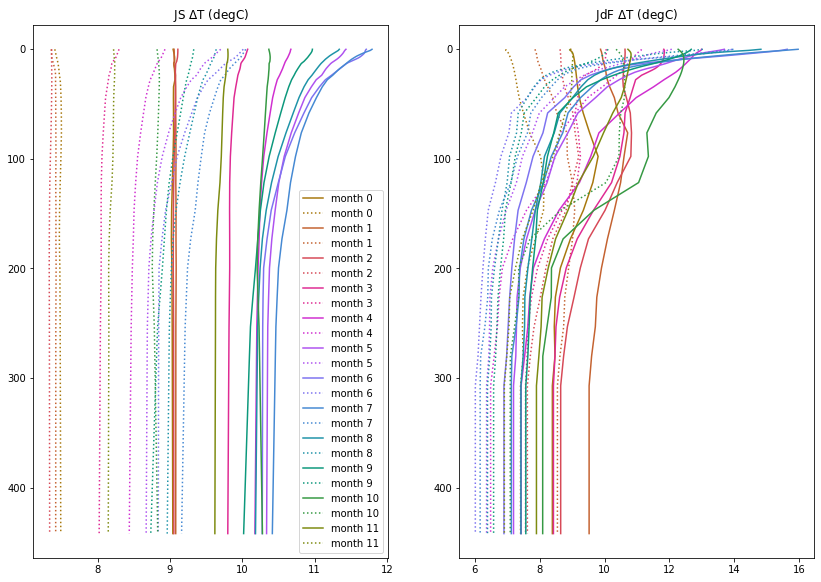

In [81]:
w = nc.Dataset('./adjusted_BCS/Dosser_north_TEOS10_TEPLO50_SSP245_JS.nc')
w2 = nc.Dataset(f'//data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')


from cmocean import cm
tcm = cm.phase

fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


deptht
for i in range(0,12):
    axs[0].plot(w['votemper'][i,:,0,0], depth_ssc, color = tcm((i)/12),linestyle = '-', label = f'month {i}')
    axs[0].plot(w2['votemper'][i,:,0,0], depth_ssc, color = tcm((i)/12),linestyle = ':', label = f'month {i}')
    
    if i <9:
        mstr = f'0{i+1}'
    else:
        mstr = f'{i+1}'
    w3 = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2017m{mstr}d15.nc')
    w4 = nc.Dataset(f'./adjusted_BCS/TEPLO50_SSP245_v201905_y2017m{mstr}d15.nc')

    axs[1].plot(w3['votemper'][0,:,0,100], depth_ssc, color = tcm((i)/12),linestyle = ':', label = f'month {i}')
    axs[1].plot(w4['votemper'][0,:,0,100], depth_ssc, color = tcm((i)/12),linestyle = '-', label = f'month {i}')

axs[0].legend()
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_title('JS $\Delta$T (degC)')
axs[1].set_title('JdF $\Delta$T (degC)')


## RIVER DELTA  > take the inner salish sea waters and 



Text(0.5, 1.0, 'Mon 6, historical \n 1986-2005 sea surface temperature - SSC box highlighted')

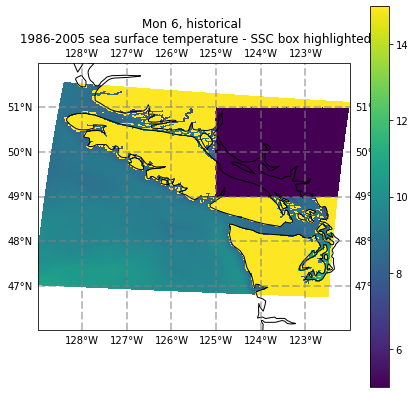

In [86]:
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


plt.figure(figsize=(7, 7))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

boxbox = (lat > 49) & (lat < 51) & (lon > -125 )
data_hist_test = np.copy(data_hist)
data_hist_test[boxbox] = 2
ax1.set_extent(extent)
# ax1.gridlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon, lat, data_hist_test, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Mon 6, historical \n 1986-2005 sea surface temperature - SSC box highlighted')


Text(0.5, 1.0, '$\\Delta$T RCP45 - historical, salish sea domain only, $\\degree$C')

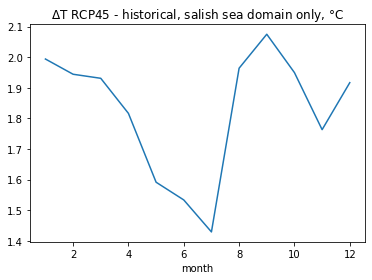

In [93]:
np.shape(seatemp_hist['temp'][:])

monthly_sst_delta = np.zeros(12)

for i in range(0,12):
    fut_st = seatemp_RCP45['temp'][i,0,:,:] 
    hist_st = seatemp_hist['temp'][i,0,:,:]
    
    monthly_sst_delta[i] = np.nanmean(fut_st[boxbox]) - np.nanmean(hist_st[boxbox])
# data_hist = seatemp_hist['temp'][0,0,:,:]
# data_RCP45 = seatemp_RCP45['temp'][0,0,:,:]

plt.plot(np.arange(1,13,1), monthly_sst_delta)
plt.xlabel('month')
plt.title('$\Delta$T RCP45 - historical, salish sea domain only, $\degree$C')